<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Dip-Lab/blob/main/lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

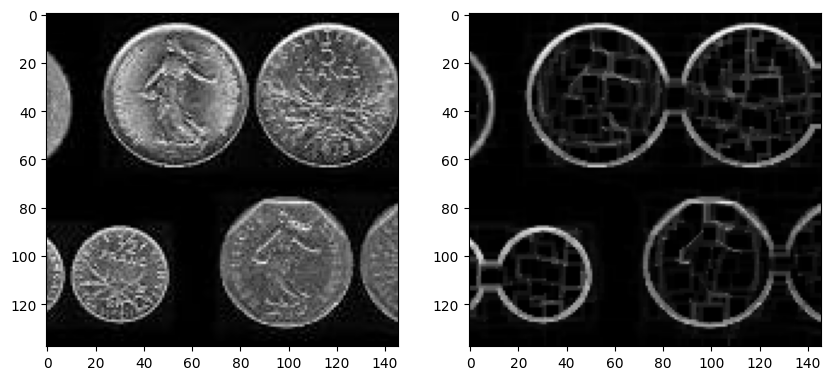

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def myMorphology(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    kernel = np.ones((5, 5), np.uint8)

    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    eroded_image = cv2.erode(closed_image, kernel, iterations=1)

    boundaries = closed_image - eroded_image

    return boundaries

image_path = "/content/image_2024-12-05_235220630.png"
boundaries = myMorphology(image_path)

imgGrey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgGrey, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(boundaries, cmap="gray")
plt.show()


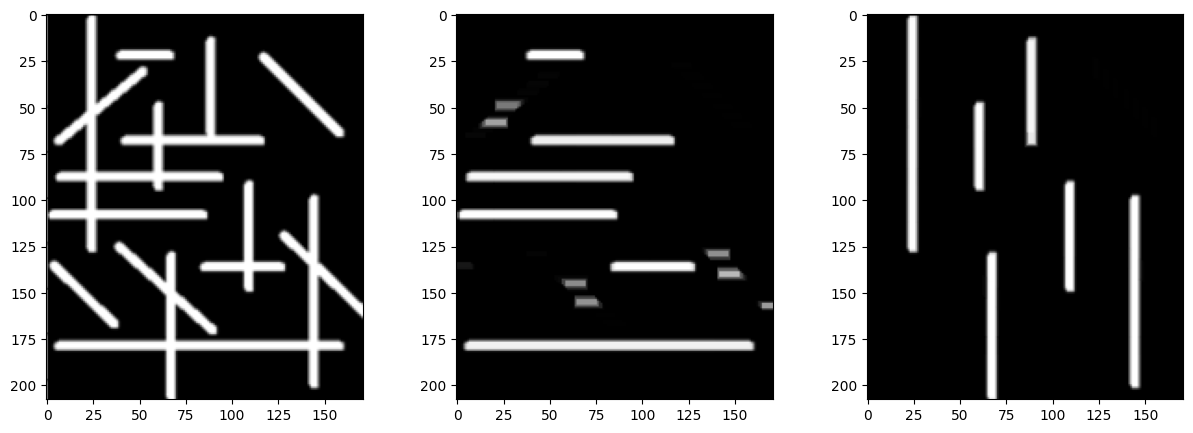

In [4]:
image = cv2.imread('/content/image_2024-12-05_235437390.png', cv2.IMREAD_GRAYSCALE)

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 3))
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 11))

horizontal_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, horizontal_kernel)

vertical_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, vertical_kernel)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(horizontal_opening, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(vertical_opening, cmap='gray')

plt.show()


In [6]:
image = cv2.imread('/content/image_2024-12-05_235437390.png', cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel_line = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
dilated_line = cv2.dilate(binary_image, kernel_line)

num_lines, _ = cv2.connectedComponents(dilated_line)

kernel_word = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
dilated_word = cv2.dilate(binary_image, kernel_word)

num_words, _ = cv2.connectedComponents(dilated_word)

print(f"Number of lines: {num_lines}")
print(f"Number of words: {num_words}")

cv2.imshow("Binarized Image", binary_image)
cv2.imshow("Dilated Lines", dilated_line)
cv2.imshow("Dilated Words", dilated_word)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of lines: 2
Number of words: 2


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
